  
※ 풀이 과정에서 사용된 Library의 경우, 제출 함수 내부에서 import 하는 과정을 함께 작성해 주세요.**

※ 제출 파일은 **채점용 .py(파이썬) 파일, 기록용 .ipynb(주피터노트북) 파일** 2가지 형태로 제출

     (1) 채점용 .py 파일엔 각 문제에서 요구하는 이름으로 만든 함수 혹은 class 만이 포함되도록 작성합니다. (정답 함수와 관계없는 객체 반환,  print 등의 내용이 들어가지 않도록 주의!)  
     (2) 기록용 .ipynb 파일은 문제 풀이에 사용된 함수외의 주석, 함수 실행 내용, print 내용등이 들어가도 되며, 혹시 모를 경우 참고용으로 확인하고자 함입니다.   
     (3) 두 파일의 함수 작성 내용이 다른 경우,  채점은 .py 파일을 기반으로 진행 됩니다.  
     (4) 주피터 노트북으로 작업 한뒤, 해당 내용을 .ipynb와 .py 로 다운 로드 받은 다음 .py파일을 검토 후 제출 합니다.
     (5) 코드의 결과는 예시 입력의 정답 여부에 따라 자동으로 채점 되기 때문에 부분 점수는 부여 되지 않습니다.

# 1


주어진 신용카드 데이터의 amount 변수 결측치를 처리하 고, type별로 거래 건수를 날짜별로 표시하는 그림을 그려라.

> * 함수이름 :　F1
> * 함수 사용법 : F1(data)  
>     (1) 함수의 인자 (data) : 아래 사이트로부터 space로 구분된 데이터를 데이터프레임으로 불러온다.  
>                 https://raw.githubusercontent.com/soulJ90/RPythonClass/main/credit.txt  
>     (2) groupby를 활용하여서 데이터의 결측치를 처리하고, 그림을 보여줄 수 있다.  
>     (3) user_function1 함수의 return 객체는 원본 데이터에 결측치가 채워진 데이터이다.  

> * 주의 사항  
> (1) 결측치 처리 : amount 값의 결측치는 각 type 별 amount의 중앙값(median)으로 대신함.  
> (2) 그림 :　소비 유형 type 별로 거래 건수를 date에 따라 선그림으로 그림  
>       - figsize=(14,6)
>       - legend : 위치는 오른쪽 위, 2열로 구성, fontsize=11
>       - x축, y축 이름 : 각각 “date”, “the number of transactions”
>       - title : “the number of credit card transactions”, fontsize=15

In [223]:
def F1(data):
  # url에서 파일을 받아오기 위한 모듈
  import urllib.request
  # 데이터 프레임 컨트롤을 위한 모듈
  import pandas as pd
  # 그래프 컨트롤을 위한 모듈
  import matplotlib.pyplot as plt

  # url 변수의 링크에서 데이터를 받아와 UTF-8 형식으로 디코딩 -> 받아온 데이터는 bytes 형식이어서 변환해주어야함
  with urllib.request.urlopen(data) as response:
    html = response.read().decode('UTF-8')

  # 줄 단위로 쪼갬
  data = html.split('\r\n')

  # 줄 단위로 쪼갠 데이터를 각각 공백단위로 다시 쪼갬
  for i in range(len(data)):
    data[i] = data[i].split(' ')

  # 리스트를 데이터 프레임으로 변환, 첫번째 줄은 칼럼 이름, 1번째부터 마지막 -1 번째까지가 데이터. 맨 마지막은 공백이라 버려줌
  df = pd.DataFrame(data=data[1:-1], columns=data[0])
  # 비어있는 amount 문자열 값 None 대입
  df.loc[df['amount'] == '', 'amount'] = None
  # amount 타입 실수형으로 변환
  df = df.astype({'amount':'float64'})

  # 타입별로 묶어 결측치 중앙값 추출
  group = df.groupby('type')['amount'].median()
  medians = group.median()
  # 결측값에 중앙값 대체
  df = df.apply(lambda x: x.fillna(medians))
  # 그룹별로 나누어 그래프 그리기. 사이즈는 14,6
  df.groupby(['date', 'type'])['amount'].size().unstack().plot(figsize=(14,6))
  # 범례 생성
  plt.legend(title='Consumtion type', loc='upper right', ncols=2, fontsize=11)
  # x축 이름 설정
  plt.xlabel('date')
  # y축 이름 설정
  plt.ylabel('the number of transactions')
  # 그래프 제목 설정
  plt.title('the number of credit card transactions', fontsize=15)

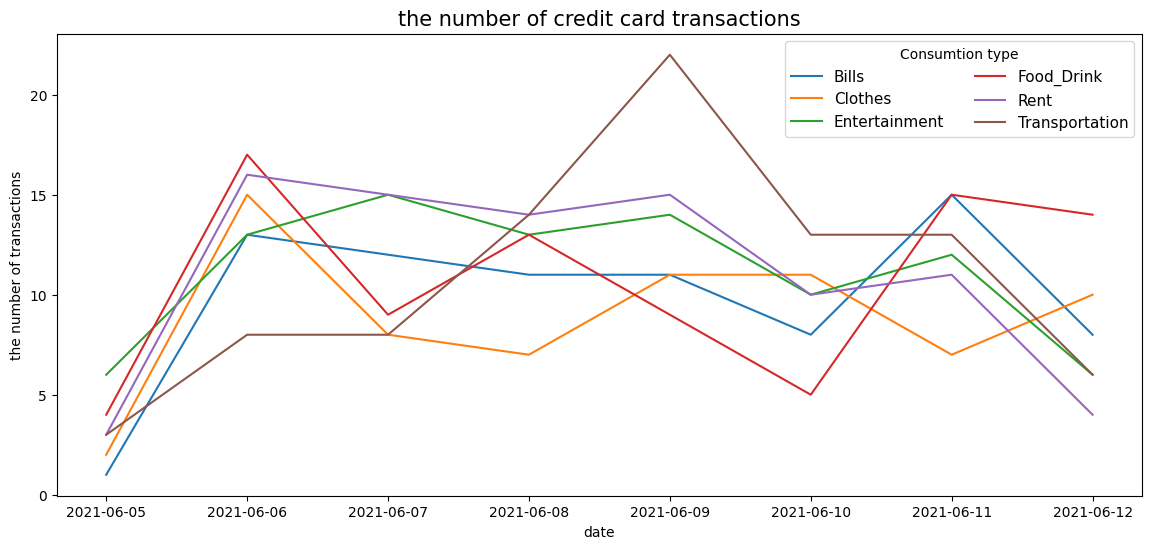

In [224]:
data = 'https://raw.githubusercontent.com/soulJ90/RPythonClass/main/credit.txt'

#함수실행 결과
F1(data)

# 2

X ~ Uniform(0,1) 인 균일분포로 부터 n개의 난수를 추출하여 추출된 난수에 대한 표본 평균을 구하는 과정을 500번 반복하여
해당 자료에 대한 히스토그램을 그려 표본 크기에 따른 표본 평균의 분포를 확인하고자 한다.

> * 함수이름 :　F2
> * 함수 사용법 : F2(num)  
>     (1) 함수의 인자 (num) : 4개의 난수의 개수 (n)의 후보를 담고 있는 리스트  ex) num=[2,3,5,10]  
>     (2) n개의 난수 추출시 사용되는 seed number 는 n으로 함.    
>     (3) 예를 들어, num 리스트의 첫번 째 요소 2에 대해서는 U(0,1)의 분포로 부터 seed number=2 하에서 2개의 난수를 추출하고,
>     추출된 2개의 난수의 평균을 500번 반복해 구함  
>     (4) num의 두번째 요소 3에 대해서도 seed number= 3 하에서 3개의 난수를 추출하고, 평균을 구하는 과정을 500번 반복함.   
>     (5) num의 요소 5, 10에 대해서도 각각 구해진 각각 평균을 구하는 과정을 500번 반복함.  
>     (6) n=2,3,5,10 각각에 대해서 얻어진 500개의 데이터를 가지고, 4개의 subplot으로 이루어진 histogram을 그림.  

> * 주의 사항  
> (1) histogram의 title은 n에 따라서 지정되며, alpha= 0.5로 고정함.   
> (2) 이 외의 옵션은 default를 유지함.

In [255]:
def F2(nums):
  import numpy as np
  import matplotlib.pyplot as plt

  # 각 난수들에 대해
  for num in nums:
    # 시드 설정
    np.random.seed(num)
    means = []

    for i in range(500):
      # 균일 분포에서 난수 생성 후 표본 평균 계산
      means.append(np.mean(np.random.uniform(0, 1, num)))
    # 히스토그램 그리기
    plt.figure(figsize=(12, 8))
  for i in range(len(nums)):
      plt.subplot(2, 2, i+1)
      plt.hist(means, alpha=0.5, label=f"n={nums[i]}")
  plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

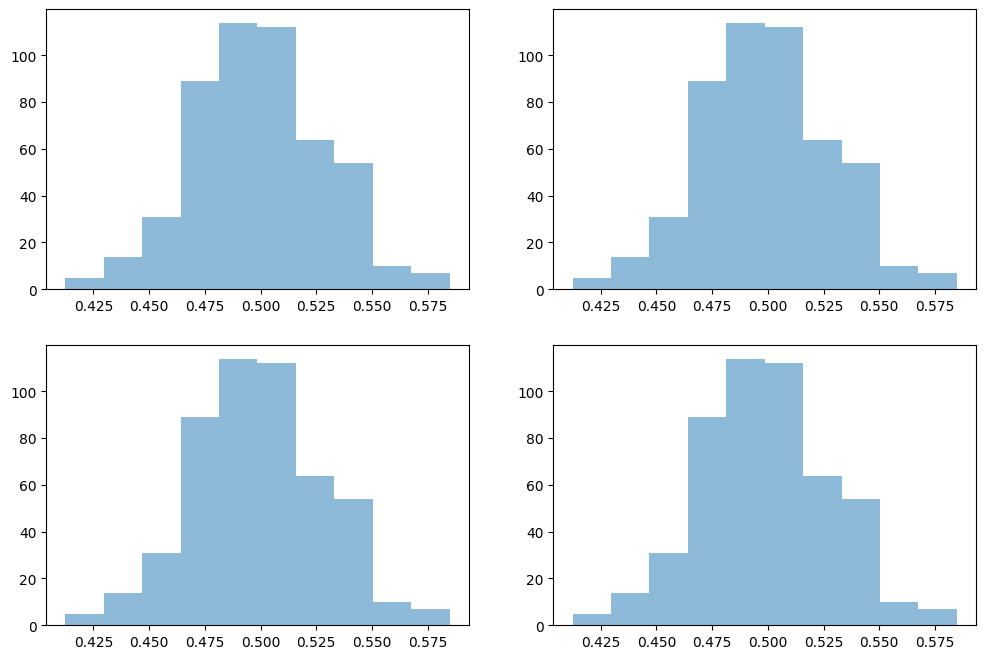

In [256]:
# 입출력 예시 1
nums = [1, 2, 10, 100]
F2(nums)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

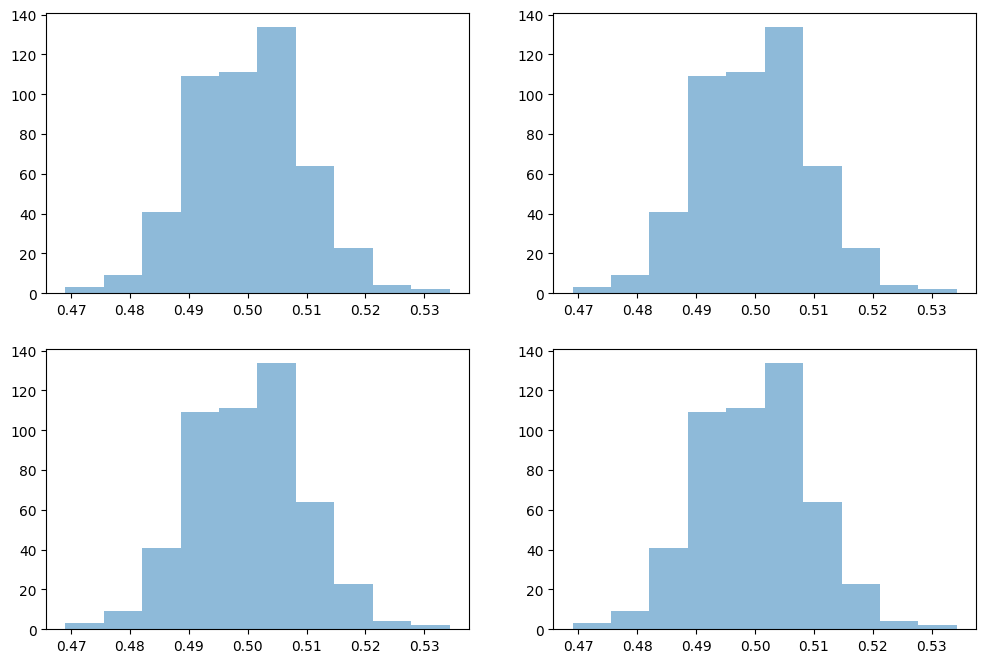

In [257]:
#입출력예시 2
nums = [1, 100 ,300, 1000]
F2(nums)